<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Road%20segmentation%20on%20Satellite%20Imageset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to segment people in images



## 3. How to train a custom segmenter using "AAU VAP Trimodal People Segmentation"

# About the networks


1. UNet
  - https://arxiv.org/abs/1505.04597
  - https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47
  - https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5


2. FPN
  - http://openaccess.thecvf.com/content_cvpr_2017/papers/Lin_Feature_Pyramid_Networks_CVPR_2017_paper.pdf
  - https://towardsdatascience.com/review-fpn-feature-pyramid-network-object-detection-262fc7482610
  - https://medium.com/@jonathan_hui/understanding-feature-pyramid-networks-for-object-detection-fpn-45b227b9106c


3. PSPNet
  - https://arxiv.org/abs/1612.01105
  - https://towardsdatascience.com/review-pspnet-winner-in-ilsvrc-2016-semantic-segmentation-scene-parsing-e089e5df177d
  - https://developers.arcgis.com/python/guide/how-pspnet-works/


4. Linknet
  - https://arxiv.org/pdf/1707.03718.pdf
  - https://neptune.ai/blog/image-segmentation-tips-and-tricks-from-kaggle-competitions

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/9_segmentation_models/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_cuda10.0.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [2]:
from infer_segmentation import Infer

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [3]:
gtf = Infer();

In [4]:
classes_dict = {
    'background': 0, 
    'person': 1
};
classes_to_train = ['background', 'person'];

In [5]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[256, 256])

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xGBGpttQs1XxXJJnP9HSRo3yCZH4dj4R' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xGBGpttQs1XxXJJnP9HSRo3yCZH4dj4R" -O seg_trimodal_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq seg_trimodal_trained.zip

In [6]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='seg_trimodal_trained/best_model.h5')

In [7]:
gtf.Setup();












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






In [25]:
! cp  seg_trimodal_trained/test/4.png

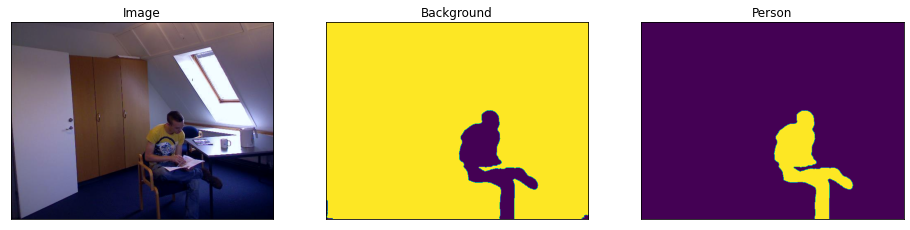

In [18]:
gtf.Predict("seg_trimodal_trained/test/1.png", vis=True);

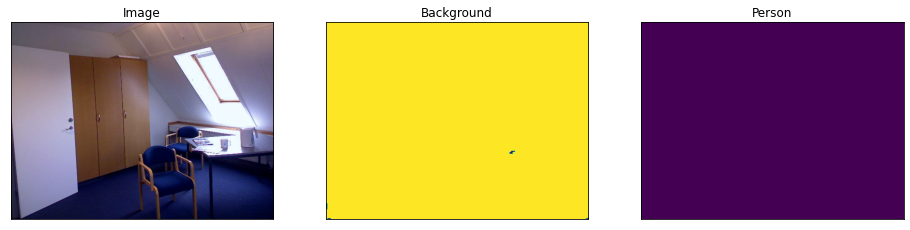

In [20]:
gtf.Predict("seg_trimodal_trained/test/2.png", vis=True);

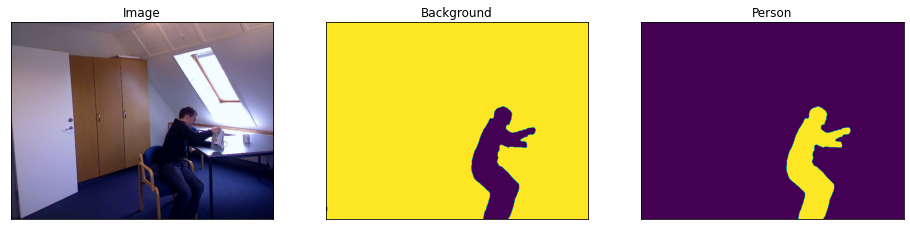

In [16]:
gtf.Predict("seg_trimodal_trained/test/3.png", vis=True);

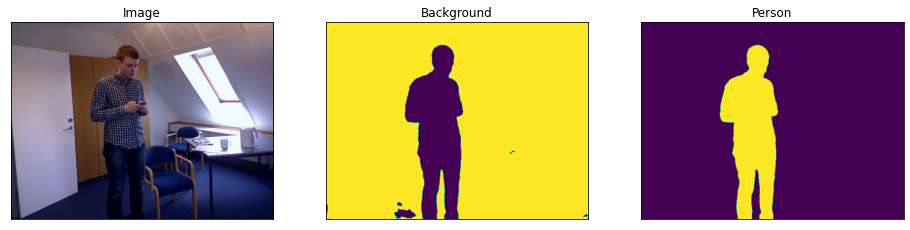

In [26]:
gtf.Predict("seg_trimodal_trained/test/4.png", vis=True);

# Train you own detector

# Monk Format

## Dataset Directory Structure

      root_dir
          |
          | 
          |         
          |----train_img_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on) 
          |
          |----train_mask_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_img_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_mask_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)

          
          

# Sample Dataset Credits

    credits: https://www.kaggle.com/aalborguniversity/trimodal-people-segmentation

In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download aalborguniversity/trimodal-people-segmentation

In [ ]:
! unzip -qq trimodal-people-segmentation.zip

In [ ]:
! mkdir dataset
! mkdir dataset/images
! mkdir dataset/masks

In [ ]:
! mv TrimodalDataset/Scene\ 1 TrimodalDataset/scene_1
! mv TrimodalDataset/Scene\ 2 TrimodalDataset/scene_2
! mv TrimodalDataset/Scene\ 3 TrimodalDataset/scene_3

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
num = 0;

img_list = os.listdir("TrimodalDataset/scene_1/rgbMasks");
for i in tqdm(range(len(img_list))):
    try:
        mask = cv2.imread("TrimodalDataset/scene_1/rgbMasks/" + img_list[i]);
        mask[mask > 0] = 1;
        cv2.imwrite("dataset/masks/scene_1_" + str(num) + ".png", mask);
        img = cv2.imread("TrimodalDataset/scene_1/SyncRGB/" + img_list[i].split(".")[0] + ".jpg")
        cv2.imwrite("dataset/images/scene_1_" + str(num) + ".png", img)
        num += 1;
    except:
        print("TrimodalDataset/scene_1/rgbMasks/" + img_list[i])

In [ ]:
img_list = os.listdir("TrimodalDataset/scene_2/rgbMasks");
for i in tqdm(range(len(img_list))):
    try:
        mask = cv2.imread("TrimodalDataset/scene_2/rgbMasks/" + img_list[i]);
        mask[mask > 0] = 1;
        cv2.imwrite("dataset/masks/scene_2_" + str(num) + ".png", mask);

        img = cv2.imread("TrimodalDataset/scene_2/SyncRGB/" + img_list[i].split(".")[0] + ".jpg")
        cv2.imwrite("dataset/images/scene_2_" + str(num) + ".png", img)

        num += 1;
    except:
        print("TrimodalDataset/scene_2/rgbMasks/" + img_list[i])

In [ ]:
img_list = os.listdir("TrimodalDataset/scene_3/rgbMasks");
for i in tqdm(range(len(img_list))):
    try:
        mask = cv2.imread("TrimodalDataset/scene_3/rgbMasks/" + img_list[i]);
        mask[mask > 0] = 1;
        cv2.imwrite("dataset/masks/scene_3_" + str(num) + ".png", mask);

        img = cv2.imread("TrimodalDataset/scene_1/SyncRGB/" + img_list[i].split(".")[0] + ".jpg")
        cv2.imwrite("dataset/images/scene_3_" + str(num) + ".png", img)

        num += 1;
    except:
        print("TrimodalDataset/scene_3/rgbMasks/" + img_list[i])

## Training 

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from train_segmentation import Segmenter

In [ ]:
gtf = Segmenter();

In [ ]:
train_img_dir = "dataset/images";
train_mask_dir = "dataset/masks";

val_img_dir = "dataset/images";
val_mask_dir = "dataset/masks";

In [ ]:
classes_dict = {
    'background': 0, 
    'person': 1
};
classes_to_train = ['background', 'person'];

In [ ]:
gtf.Train_Dataset(train_img_dir, train_mask_dir, classes_dict, classes_to_train)

In [ ]:
gtf.Val_Dataset(val_img_dir, val_mask_dir)

In [ ]:
gtf.List_Backbones();

In [ ]:
gtf.Data_Params(batch_size=2, backbone="efficientnetb3", image_shape=[256, 256])

In [ ]:
gtf.List_Models();

In [ ]:
gtf.Model_Params(model="Unet")

In [ ]:
gtf.Train_Params(lr=0.0001)

In [ ]:
gtf.Setup();

In [ ]:
gtf.Train(num_epochs=300);

In [ ]:
gtf.Visualize_Training_History();

# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from infer_segmentation import Infer

In [ ]:
gtf = Infer();

In [ ]:
classes_dict = {
    'background': 0, 
    'person': 1
};
classes_to_train = ['background', 'person'];

In [ ]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[256, 256])

In [ ]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='best_model.h5')

In [ ]:
gtf.Setup();

In [ ]:
gtf.Predict("dataset/images/scene_2_3502.png", vis=True);